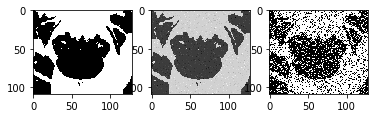

---4 neighbours ---
1 iteration:
1. done, 2. done, 3. done


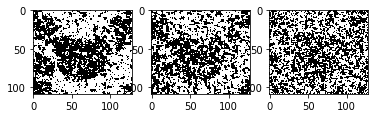

2 iteration:
1. done, 2. done, 3. done


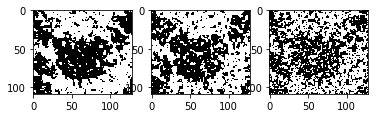

10 iteration:


KeyboardInterrupt: 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import imread

def add_gaussian_noise(im,prop,varSigma):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    e = varSigma*np.random.randn(np.prod(im.shape)).reshape(im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] += e[index]
    return im2

def add_saltnpeppar_noise(im,prop):
    N = int(np.round(np.prod(im.shape)*prop))
    index = np.unravel_index(np.random.permutation(np.prod(im.shape))[1:N],im.shape)
    im2 = np.copy(im).astype('float')
    im2[index] = 1-im2[index]
    return im2

def neighbours(i,j,M,N,size=4):
    if size==4:
        if (i==0 and j==0):
            n=[(0,1), (1,0)]
        elif i==0 and j==N-1:
            n=[(0,N-2), (1,N-1)]
        elif i==M-1 and j==0:
            n=[(M-1,1), (M-2,0)]
        elif i==M-1 and j==N-1:
            n=[(M-1,N-2), (M-2,N-1)]
        elif i==0:
            n=[(0,j-1), (0,j+1), (1,j)]
        elif i==M-1:
            n=[(M-1,j-1), (M-1,j+1), (M-2,j)]
        elif j==0:
            n=[(i-1,0), (i+1,0), (i,1)]
        elif j==N-1:
            n=[(i-1,N-1), (i+1,N-1), (i,N-2)]
        else:
            n=[(i-1,j), (i+1,j), (i,j-1), (i,j+1)]

        return n

    if(size == 8):
        n = []
        for x in range (i-1, i+1+1):
            for y in range(j-1, j+1+1):
                if (x >= 0 and x < M):
                    if (y >= 0 and y < N):
                        if (y != j or x != i):
                            n.append((x,y))
        return n

def L(x, y):
    if y == 0:
        y = -1
    return x * y

def E(w, x, i, j, size = 4):
    sum = 0
    for neighbour in neighbours(i, j, x.shape[0], x.shape[1], size = size):
        sum += w[i][j] * x[i][j] * x[neighbour[0]][neighbour[1]]
    return sum

def MCMC_Gibbs(y, x, w = np.ones(1), iteration = 1, size = 4):
    xt = np.copy(x)
    if(w == np.ones(1)):
        w = np.ones(x.shape)
        
    for T in range (0, iteration):
        for i in range (xt.shape[0]):
            for j in range (xt.shape[1]):
                xt[i][j] = 1
                nominator = np.exp(L(xt[i][j], y[i][j])) * np.exp(E(w, xt, i, j, size = size))

                denom_left = np.exp(L(xt[i][j], y[i][j])) * np.exp(E(w, xt, i, j, size = size))
                xt[i][j] = -1
                denom_right = np.exp(L(xt[i][j], y[i][j])) * np.exp(E(w, xt, i, j, size = size))
                denominator = denom_left + denom_right
                p_i = nominator / denominator
                t = np.random.uniform(0,1)
                if p_i > t:
                    xt[i][j] = 1
                else:
                    xt[i][j] = -1
    return(xt)

def MCMC_Gibbs_randOrd(y, x, w = np.ones(1), iteration = 1, size = 4):
    xt = np.copy(x)
    if(w == np.ones(1)):
        w = np.ones(x.shape)
        
    for T in range (0, iteration):
        N = int(np.round(np.prod(x.shape)))
        index = np.unravel_index(np.random.permutation(np.prod(x.shape))[1:N],x.shape)    
        zipindex = list(zip(index[0],index[1]))
        for i in range (0, len(zipindex)):
            xt[zipindex[i]] = 1
            nominator = np.exp(L(xt[zipindex[i]], y[zipindex[i]])) * np.exp(E(w, xt, zipindex[i][0], zipindex[i][1], size = size))

            denom_left = np.exp(L(xt[zipindex[i]], y[zipindex[i]])) * np.exp(E(w, xt, zipindex[i][0], zipindex[i][1], size = size))
            xt[zipindex[i]] = -1
            denom_right = np.exp(L(xt[zipindex[i]], y[zipindex[i]])) * np.exp(E(w, xt, zipindex[i][0], zipindex[i][1], size = size))
            denominator = denom_left + denom_right
            p_i = nominator / denominator
            t = np.random.uniform(0,1)
            if p_i > t:
                xt[zipindex[i]] = 1
            else:
                xt[zipindex[i]] = -1
    return(xt)

def MCMC_Gibbs_randOrdNum(y, x, w = np.ones(1), iteration = 1, size = 4):
    xt = np.copy(x)
    if(w == np.ones(1)):
        w = np.ones(x.shape)
        
    for T in range (0, iteration):
        i = np.random.randint(0, x.shape[0]-1)
        j = np.random.randint(0, x.shape[1]-1)
        
        xt[i][j] = 1
        nominator = np.exp(L(xt[i][j], y[i][j])) * np.exp(E(w, xt, i, j, size = size))

        denom_left = np.exp(L(xt[i][j], y[i][j])) * np.exp(E(w, xt, i, j, size = size))
        xt[i][j] = -1
        denom_right = np.exp(L(xt[i][j], y[i][j])) * np.exp(E(w, xt, i, j, size = size))
        denominator = denom_left + denom_right
        p_i = nominator / denominator
        t = np.random.uniform(0,1)
        if p_i > t:
            xt[i][j] = 1
        else:
            xt[i][j] = -1
    return(xt)


def do_plot(image, prop = 0.1, size = 4, iterations = 10):
    fig = plt.figure()
    x = np.random.choice((-1, 1), image.shape)
    mcmc_image = MCMC_Gibbs(image, x, iteration = iterations)
    ax1 = fig.add_subplot(131)
    ax1.imshow(mcmc_image, cmap = 'gray')
    print("1. done,", end=' ')
    x = np.random.choice((-1, 1), im2.shape)
    mcmc_image_randOrd = MCMC_Gibbs_randOrd(image, x, iteration = iterations)
    ax2 = fig.add_subplot(132)
    ax2.imshow(mcmc_image_randOrd, cmap = 'gray')
    print("2. done,", end =' ')
    x = np.random.choice((-1, 1), im2.shape)
    mcmc_image_randOrd = MCMC_Gibbs_randOrdNum(image, x, iteration = x.shape[0] * x.shape[1] * iterations)
    ax3 = fig.add_subplot(133)
    ax3.imshow(mcmc_image_randOrd, cmap = 'gray')
    print("3. done")
    plt.show()
    
np.random.seed(42)

# proportion of pixels to alter
prop = 0.2
varSigma = 0.1
im = imread('resized_gray_pug.png')
im = im/255
fig = plt.figure()
ax = fig.add_subplot(131)
ax.imshow(im,cmap='gray')
im2 = add_gaussian_noise(im,prop,varSigma)
ax2 = fig.add_subplot(132)
ax2.imshow(im2,cmap='gray')
im3 = add_saltnpeppar_noise(im,prop)
ax3 = fig.add_subplot(133)
ax3.imshow(im3,cmap='gray')

plt.show()

print("---4 neighbours ---")
print("1 iteration:")
do_plot(im3, prop = 0.1, size = 4, iterations = 1)
print("2 iteration:")
do_plot(im3, prop = 0.1, size = 4, iterations = 2)
print("10 iteration:")
do_plot(im3, prop = 0.1, size = 4, iterations = 10)
print("15 iteration:")
do_plot(im3, prop = 0.1, size = 4, iterations = 15)
print("20 iteration:")
do_plot(im3, prop = 0.1, size = 4, iterations = 20)
print("100 iteration:")
do_plot(im3, prop = 0.1, size = 4, iterations = 100)
